# Supervised Learning - Linear Regression

Multiple Linear Regression
Predict independent variable (NIL valuation) using multiple variables

Import Libraries


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.decomposition import PCA

from scipy import stats
from scipy.stats import kurtosis, skew

import seaborn as sns

%matplotlib inline



Load the Data (football_clean_supervised for this example)

In [3]:
def load_dataset(data):
    df = pd.read_csv(data)
   
    return df


In [4]:
df_football= load_dataset('cleaned_files/football_clean_supervised.csv')

In [5]:
df_football.head(5)

,Unnamed: 0,NAME,GRADE,AGE,SKILL,STARCOLL,NUMOFF,POS,HEIGHT_IN,WEIGHT_LBS,...,TIK_LONG,TOT_FOL,SPORT,RECRUIT_YEAR,EXP_MONTHS,EXP_YEARS,institution_name_short,ClassificationCode,REV_MEN,EXP_MEN
0,0,Arch Manning,2.0,18.28281,99.53,Texas,18.0,1.0,75.5,220.0,...,8900.0,73900.0,football,2023.0,2.0,0.172603,Texas,1.0,161532860.0,50633156.0
1,1,Anthony Hill,2.0,18.00000,97.87,Texas,25.0,8.0,73.5,225.0,...,0.0,13100.0,football,2023.0,2.0,0.172603,Texas,1.0,161532860.0,50633156.0
2,2,CJ Baxter Jr.,2.0,18.00000,97.26,Texas,25.0,9.0,73.0,216.0,...,1700.0,10900.0,football,2023.0,2.0,0.172603,Texas,1.0,161532860.0,50633156.0
3,3,Johntay Cook II,2.0,18.00000,97.23,Texas,25.0,3.0,71.0,175.0,...,136000.0,153800.0,football,2023.0,2.0,0.172603,Texas,1.0,161532860.0,50633156.0
4,4,Malik Muhammad,2.0,19.00000,96.22,Texas,25.0,7.0,72.0,180.0,...,8100.0,16200.0,football,2023.0,2.0,0.172603,Texas,1.0,161532860.0,50633156.0


In [6]:
df_football.columns

Index(['Unnamed: 0', 'NAME', 'GRADE', 'AGE', 'SKILL', 'STARCOLL', 'NUMOFF',
       'POS', 'HEIGHT_IN', 'WEIGHT_LBS', 'COLLDIST_MI', 'NILVAL_LONG_USD',
       'INSTA_LONG', 'TWIT_LONG', 'TIK_LONG', 'TOT_FOL', 'SPORT',
       'RECRUIT_YEAR', 'EXP_MONTHS', 'EXP_YEARS', 'institution_name_short',
       'ClassificationCode', 'REV_MEN', 'EXP_MEN'],
      dtype='object')

## Further preprocessing

In [7]:
#remove Unnamed:0 and Sport column- not necessary 
def drop_col(df):
    df=df.drop(columns=['Unnamed: 0', 'SPORT'])
    return df

In [8]:
df_football = drop_col(df_football)

In [9]:
# df_football.head(3)
df_football.columns

Index(['NAME', 'GRADE', 'AGE', 'SKILL', 'STARCOLL', 'NUMOFF', 'POS',
       'HEIGHT_IN', 'WEIGHT_LBS', 'COLLDIST_MI', 'NILVAL_LONG_USD',
       'INSTA_LONG', 'TWIT_LONG', 'TIK_LONG', 'TOT_FOL', 'RECRUIT_YEAR',
       'EXP_MONTHS', 'EXP_YEARS', 'institution_name_short',
       'ClassificationCode', 'REV_MEN', 'EXP_MEN'],
      dtype='object')

No missing data exists in football_supervised_clean as shown below.

In [10]:
df_football.isna().sum()

NAME                      0
GRADE                     0
AGE                       0
SKILL                     0
STARCOLL                  0
NUMOFF                    0
POS                       0
HEIGHT_IN                 0
WEIGHT_LBS                0
COLLDIST_MI               0
NILVAL_LONG_USD           0
INSTA_LONG                0
TWIT_LONG                 0
TIK_LONG                  0
TOT_FOL                   0
RECRUIT_YEAR              0
EXP_MONTHS                0
EXP_YEARS                 0
institution_name_short    0
ClassificationCode        0
REV_MEN                   0
EXP_MEN                   0
dtype: int64

In [11]:
# df_football.dtypes

**Label Encoding for Player NAME** <br> Although Label Encoding assumes ordinal relationship, One hot will create too many columns. LE will  assign a unique integer to each player name,converting the categorical feature (player name) into a numerical format.
**Tried this in way to use all features in inital linear regression**

In [12]:
#  # credit: https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [13]:
columns =['NAME']
df_fb= MultiColumnLabelEncoder(columns = columns).fit_transform(df_football)

In [14]:
df_fb.head(3)

,NAME,GRADE,AGE,SKILL,STARCOLL,NUMOFF,POS,HEIGHT_IN,WEIGHT_LBS,COLLDIST_MI,...,TWIT_LONG,TIK_LONG,TOT_FOL,RECRUIT_YEAR,EXP_MONTHS,EXP_YEARS,institution_name_short,ClassificationCode,REV_MEN,EXP_MEN
0,65,2.0,18.28281,99.53,Texas,18.0,1.0,75.5,220.0,459.0,...,65000.0,8900.0,73900.0,2023.0,2.0,0.172603,Texas,1.0,161532860.0,50633156.0
1,56,2.0,18.00000,97.87,Texas,25.0,8.0,73.5,225.0,207.0,...,13100.0,0.0,13100.0,2023.0,2.0,0.172603,Texas,1.0,161532860.0,50633156.0
2,167,2.0,18.00000,97.26,Texas,25.0,9.0,73.0,216.0,992.0,...,9200.0,1700.0,10900.0,2023.0,2.0,0.172603,Texas,1.0,161532860.0,50633156.0


**One Hot Encoding for STARCOLL , INSTITUTION_NAME_SHORT** <br> For categorical features without a meaningful order (nominal features), one-hot encoding is a better choice. It creates binary columns (0 or 1) for each category, effectively turning a categorical feature into multiple binary features.
<br> **Tried this for intially using all features in linear regression model**

In [15]:
def one_hot(data):
    df = pd.get_dummies(data, columns=['STARCOLL','institution_name_short'], drop_first=True)
    return df

In [16]:
df_fb= one_hot(df_fb)

In [17]:
# df_football.head()

## EDA

**Correlation plot**

In [18]:
#Correlation 
def correlation_summary(df):
    # return df.corr()
    corr_matrix = df.corr()
    return print(corr_matrix['NILVAL_LONG_USD'].sort_values(ascending=False)[:20])


In [54]:
# football_corr=correlation_summary(df_fb)
# football_corr

In [20]:
#Correlation heatmap
#https://stackoverflow.com/questions/72213733/how-to-plot-seaborn-heatmap-for-target-vs-independent-features
#+1= highly and positively correlated and -1 = highly negatively correlated.
def corr_plot(df):
    corr_matrix = df.corr()
    data=pd.DataFrame(corr_matrix['NILVAL_LONG_USD'].sort_values(ascending=False))  #plotting all but could do top (>.50)
    plt.figure(figsize = (10,40))
    return  sns.heatmap(data, annot=True, vmin=-1, vmax=1, cmap='bwr')
    # ax.tick_params(labelrotation=0)



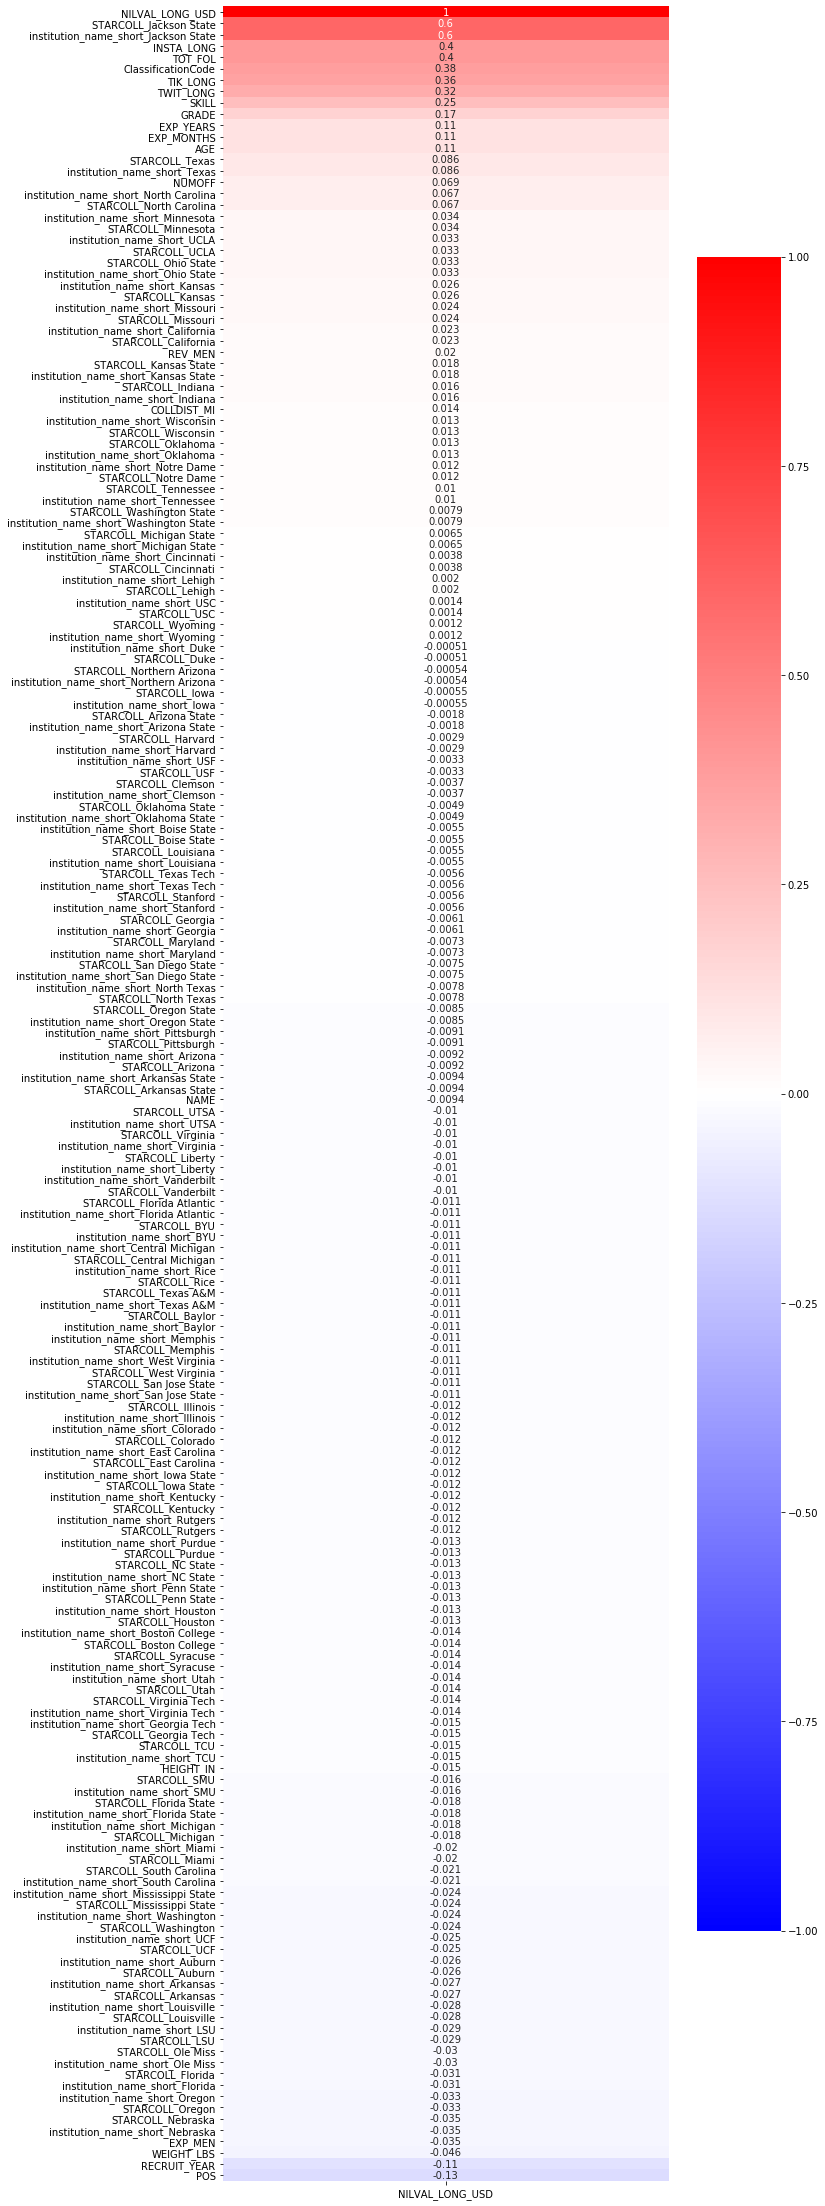

In [21]:
fb_corr_heat=corr_plot(df_fb)

NIL Value seems to be most correlated to social media (INSTA_LONG, TWIT_LONG, TIK_LONG, TOT_FOL), committed to), school classification, and skill. Why is STARCOLL- Jackson highly correlated?

## LINEAR REGRESSION MODEL - Using all features initially

<br> First iteration using all features model did not perform well
<br> Second iteration uses features based on correlation analysis above. 

**Split the data into training, validation, and test sets using custom_train_test_split function.** <br> We need to implement a smarter version of the vanilla train_test_split that can help ensure that athletes of roughly all skill levels are included in all aspects of our splits


In [22]:
def custom_train_test_split(df, valid_size_=0.15, test_size_=0.15, RANDOM_STATE=0):
    """
    :: Input(s) ::
        df - a dataframe containing all of the features and the target feature
        valid_size - the subset of the remaining training set after the test set was formed
        test_size - the size ofthe validation when compared to the training set
        RANDOM_STATE - a random state for this function to promote repeatability
    :: Output(s) ::
        X_train - training feature dataframe
        X_valid - validation feature dataframe
        X_test - testing feature dataframe
        y_train - training target feature
        y_valid - validation target feature
        y_test - testing target feature
    :: Function Description ::
        'custom_train_test_split' looks to take a cleaned dataframe and split it into the various training, validating, and testing datasets.
    """
    # Transform the continuous "SKILL_" column into a categorical such that it could be binned
    # bins = [0, 80, 85, 90, 95, 100]
    # labels = [
    #     "Very Low Skill",
    #     "Low Skill",
    #     "Medium Skill",
    #     "High Skill",
    #     "Very High Skill",
    # ]
    # df = df.copy()
    # df["SKILL_CAT"] = pd.cut(df["SKILL"], bins=bins, labels=labels).astype(str)

    
    bins =  4
    df['SKILL_CAT'] = pd.cut(df['SKILL'],bins=bins,labels=False)
    # Shuffle the dataframe
    df = df.sample(frac=1, random_state=RANDOM_STATE)

    # Get our X and y arrays
    # Target Feature: NILVAL_LONG_USD

    y = df.pop("NILVAL_LONG_USD")
    X = df

#NEW CODE
#produce test split
    X_remaining, X_test, y_remaining, y_test = train_test_split(
        X,
        y,
        test_size = test_size_,
          stratify=X["SKILL_CAT"],
        random_state=RANDOM_STATE,
    )
    

#NEW CODE
# # Calculate the new validation size based on the remaining data
    valid_size_ = valid_size_ / (1 - test_size_)
#NEW CODE
#Produce train and validation splits
    X_train, X_valid, y_train, y_valid = train_test_split(
        X_remaining,
        y_remaining,
        test_size= valid_size_,
        stratify=X_remaining["SKILL_CAT"],
        random_state=RANDOM_STATE,
    )


 

    return  X_train, y_train, X_valid, y_valid, X_test, y_test

In [23]:
 X_train, y_train, X_valid, y_valid, X_test, y_test = custom_train_test_split(df=df_fb)

In [24]:
# len(y_train)
# len(X_train)

In [25]:

print (X_train.shape,y_train.shape )
print (X_valid.shape, y_valid.shape)
print (X_test.shape, y_test.shape)

#First run give X_train shpae of (156,192), X_valid of (728,192), (X_test (379,191_- this seems wrong. X_test

(883, 192) (883,)
(190, 192) (190,)
(190, 192) (190,)


**Linear Regression Model Training, Predictions, and Metrics**

In [55]:

# # Create an instance of the LinearRegression model
model1 = LinearRegression()

# # Train the model on the training set
model1.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model1.predict(X_valid)


#Make predictions on the test set
y_test_pred = model1.predict(X_test)



#https://stackoverflow.com/questions/26319259/how-to-get-a-regression-summary-in-scikit-learn-like-r-does
import sklearn.metrics as metrics
def regression_results(str,y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    # mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('{} explained_variance: '.format (str), round(explained_variance,4))    
    # print('{} mean_squared_log_error: '.format(str), round(mean_squared_log_error,4))
    print('{} r2: '.format (str), round(r2,4))
    print('{} MAE: '.format(str), round(mean_absolute_error,4))
    print('{} MSE: '.format (str), round(mse,4))
    print('{} RMSE: '.format (str), round(np.sqrt(mse),4))



    # # Calculate and print performance metrics for the validation set
regression_results("Validation", y_valid, y_val_pred)

# Calculate and print performance metrics for the test set
regression_results('Testing', y_test, y_test_pred)

Validation explained_variance:  0.5005
Validation r2:  0.4975
Validation MAE:  85778.3715
Validation MSE:  27940526771.4377
Validation RMSE:  167154.2006
Testing explained_variance:  -8.8045
Testing r2:  -8.8944
Testing MAE:  95082.2455
Testing MSE:  211093338297.7017
Testing RMSE:  459448.9507


In [27]:
# #Get feature importance for model 
# # Get the coefficients (weights) of the features
# coefficients = model.coef_

# # Calculate the feature importance by taking the absolute values of the coefficients
# feature_importance = abs(coefficients)

# # Associate each feature importance value with the corresponding feature name
# feature_names = list(X_train.columns)  
# feature_importance_dict = dict(zip(feature_names, feature_importance))

# # Sort the feature importance values 
# sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# # Print the feature importance
# for feature, importance in sorted_feature_importance:
#     print(f"{feature}: {importance}")

In [28]:
# # Bar chart to visualize feature importance
# plt.figure(figsize=(15, 30))
# plt.barh(range(len(feature_importance)), feature_importance, align='center')
# plt.yticks(range(len(feature_importance)), feature_names)
# plt.xlabel('Feature Importance')
# plt.title('Feature Importance in Linear Regression Model')
# plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
# plt.show()

**Metrics**
<br> *Mean Squared Error (MSE)*: MSE measures the average squared difference between the actual values and the predicted values on the validation set. Lower MSE values are better, so a smaller MSE would indicate better model performance.
<br> *Mean Absolute Error (MAE)*: MAE measures the average absolute difference between the actual and predicted values on the validation set. MAE is more interpretable than the MSE because it is in the same units as the target variable.
<br>*Root Mean Squared Error (RMSE)*: RMSE is the square root of the MSE. It provides a measure of the average magnitude of the errors in the same units as the target variable. Lower RMSE values indicate better model performance.
<br>*R-squared (R2)*: (R2) value measures the proportion of the variance in the target variable that is predictable from the independent variables. Negative R2 values indicate model is performing worse than a simple horizontal line (a model that predicts the mean of the target variable).An ideal model would have an R2 value close to 1, indicating that it explains a large portion of the variance in the target variable.

**Visualize Validation Set Predictions to Actual**

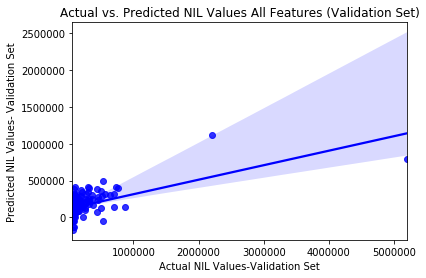

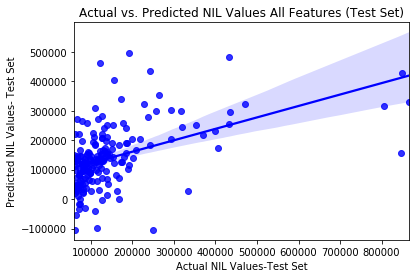

In [30]:
# Visualize the results (scatter plot of actual vs. predicted values for the validation set)
sns.regplot(x=y_valid, y=y_val_pred,color = 'blue')
plt.xlabel("Actual NIL Values-Validation Set")
plt.ylabel("Predicted NIL Values- Validation Set")
plt.title("Actual vs. Predicted NIL Values All Features (Validation Set)")
plt.show()

# Visualize the results (scatter plot of actual vs. predicted values for the test set)

sns.regplot(x=y_test, y=y_test_pred,color = 'blue')
plt.xlabel("Actual NIL Values-Test Set")
plt.ylabel("Predicted NIL Values- Test Set")
plt.title("Actual vs. Predicted NIL Values All Features (Test Set)")
plt.show()

## LINEAR REGRESSION - WITH SELECTED FEATURES

**Perform Feature Selection** <br> STARCOLL and Institution Short name are showing high correlations but may just be imbalanced class in dataset by virtue of webscraping data from ON3. More athletes from those schools may be represented?? 
<br>Use only continous variables (n = 18): <br> 'GRADE', 'AGE', 'SKILL',  'NUMOFF', 'POS',
       'HEIGHT_IN', 'WEIGHT_LBS', 'COLLDIST_MI', 'NILVAL_LONG_USD',
       'INSTA_LONG', 'TWIT_LONG', 'TIK_LONG', 'TOT_FOL', 'RECRUIT_YEAR',
       'EXP_MONTHS',  'ClassificationCode', 'REV_MEN', 'EXP_MEN'

In [31]:
#create new df

columns = ['GRADE', 'AGE', 'SKILL',  'NUMOFF', 'POS',
       'HEIGHT_IN', 'WEIGHT_LBS', 'COLLDIST_MI', 'NILVAL_LONG_USD',
       'INSTA_LONG', 'TWIT_LONG', 'TIK_LONG', 'TOT_FOL', 'RECRUIT_YEAR',
       'EXP_MONTHS',   'ClassificationCode', 'REV_MEN', 'EXP_MEN']

df_fb_select = df_football.loc[:, columns].copy()
# df_fb_select.shape  #(1263,19)




In [32]:
df_fb_select.head(3)
# df_fb_select.shape

,GRADE,AGE,SKILL,NUMOFF,POS,HEIGHT_IN,WEIGHT_LBS,COLLDIST_MI,NILVAL_LONG_USD,INSTA_LONG,TWIT_LONG,TIK_LONG,TOT_FOL,RECRUIT_YEAR,EXP_MONTHS,ClassificationCode,REV_MEN,EXP_MEN
0,2.0,18.28281,99.53,18.0,1.0,75.5,220.0,459.0,2900000.0,73900.0,65000.0,8900.0,73900.0,2023.0,2.0,1.0,161532860.0,50633156.0
1,2.0,18.00000,97.87,25.0,8.0,73.5,225.0,207.0,497000.0,13100.0,13100.0,0.0,13100.0,2023.0,2.0,1.0,161532860.0,50633156.0
2,2.0,18.00000,97.26,25.0,9.0,73.0,216.0,992.0,443000.0,10900.0,9200.0,1700.0,10900.0,2023.0,2.0,1.0,161532860.0,50633156.0


In [33]:
df_fb_select.corr()

,GRADE,AGE,SKILL,NUMOFF,POS,HEIGHT_IN,WEIGHT_LBS,COLLDIST_MI,NILVAL_LONG_USD,INSTA_LONG,TWIT_LONG,TIK_LONG,TOT_FOL,RECRUIT_YEAR,EXP_MONTHS,ClassificationCode,REV_MEN,EXP_MEN
GRADE,1.000000,0.746534,-0.129948,-0.163835,0.019830,-0.018002,0.036197,0.030881,0.172487,0.079425,0.102172,0.064094,0.079425,-0.836952,0.815496,0.086308,-0.041091,-0.032555
AGE,0.746534,1.000000,-0.239551,-0.198910,0.021978,-0.001452,0.090734,0.043424,0.109558,0.076968,0.085504,0.064496,0.076968,-0.899931,0.791934,0.079029,-0.100772,-0.103490
SKILL,-0.129948,-0.239551,1.000000,0.398076,-0.135864,0.037370,0.034401,-0.046923,0.252480,0.057527,0.099549,0.041913,0.057527,0.223969,-0.251717,-0.080225,0.315351,0.413654
NUMOFF,-0.163835,-0.198910,0.398076,1.000000,-0.076269,-0.029403,-0.005354,0.027472,0.069421,0.037675,0.010229,0.037153,0.037675,0.167282,-0.206326,-0.042688,0.162492,0.211912
POS,0.019830,0.021978,-0.135864,-0.076269,1.000000,0.017777,0.190203,-0.044032,-0.133718,-0.058907,-0.087990,-0.045381,-0.058907,-0.031278,0.034446,0.008846,0.022956,-0.023142
HEIGHT_IN,-0.018002,-0.001452,0.037370,-0.029403,0.017777,1.000000,0.403815,-0.003030,-0.015442,-0.043256,-0.021487,-0.040937,-0.043256,-0.003629,-0.000560,-0.024181,0.002801,0.015506
WEIGHT_LBS,0.036197,0.090734,0.034401,-0.005354,0.190203,0.403815,1.000000,0.005873,-0.045649,-0.092154,-0.044452,-0.087448,-0.092154,-0.111719,0.084605,-0.044452,0.090386,0.059915
COLLDIST_MI,0.030881,0.043424,-0.046923,0.027472,-0.044032,-0.003030,0.005873,1.000000,0.013713,-0.019366,0.000073,-0.020039,-0.019366,-0.029809,0.002432,-0.027930,0.012408,-0.032250
NILVAL_LONG_USD,0.172487,0.109558,0.252480,0.069421,-0.133718,-0.015442,-0.045649,0.013713,1.000000,0.402525,0.320731,0.359623,0.402525,-0.114316,0.111587,0.376254,0.020426,-0.035130
INSTA_LONG,0.079425,0.076968,0.057527,0.037675,-0.058907,-0.043256,-0.092154,-0.019366,0.402525,1.000000,0.275320,0.985490,1.000000,-0.066277,0.060153,0.219427,-0.048153,-0.063051


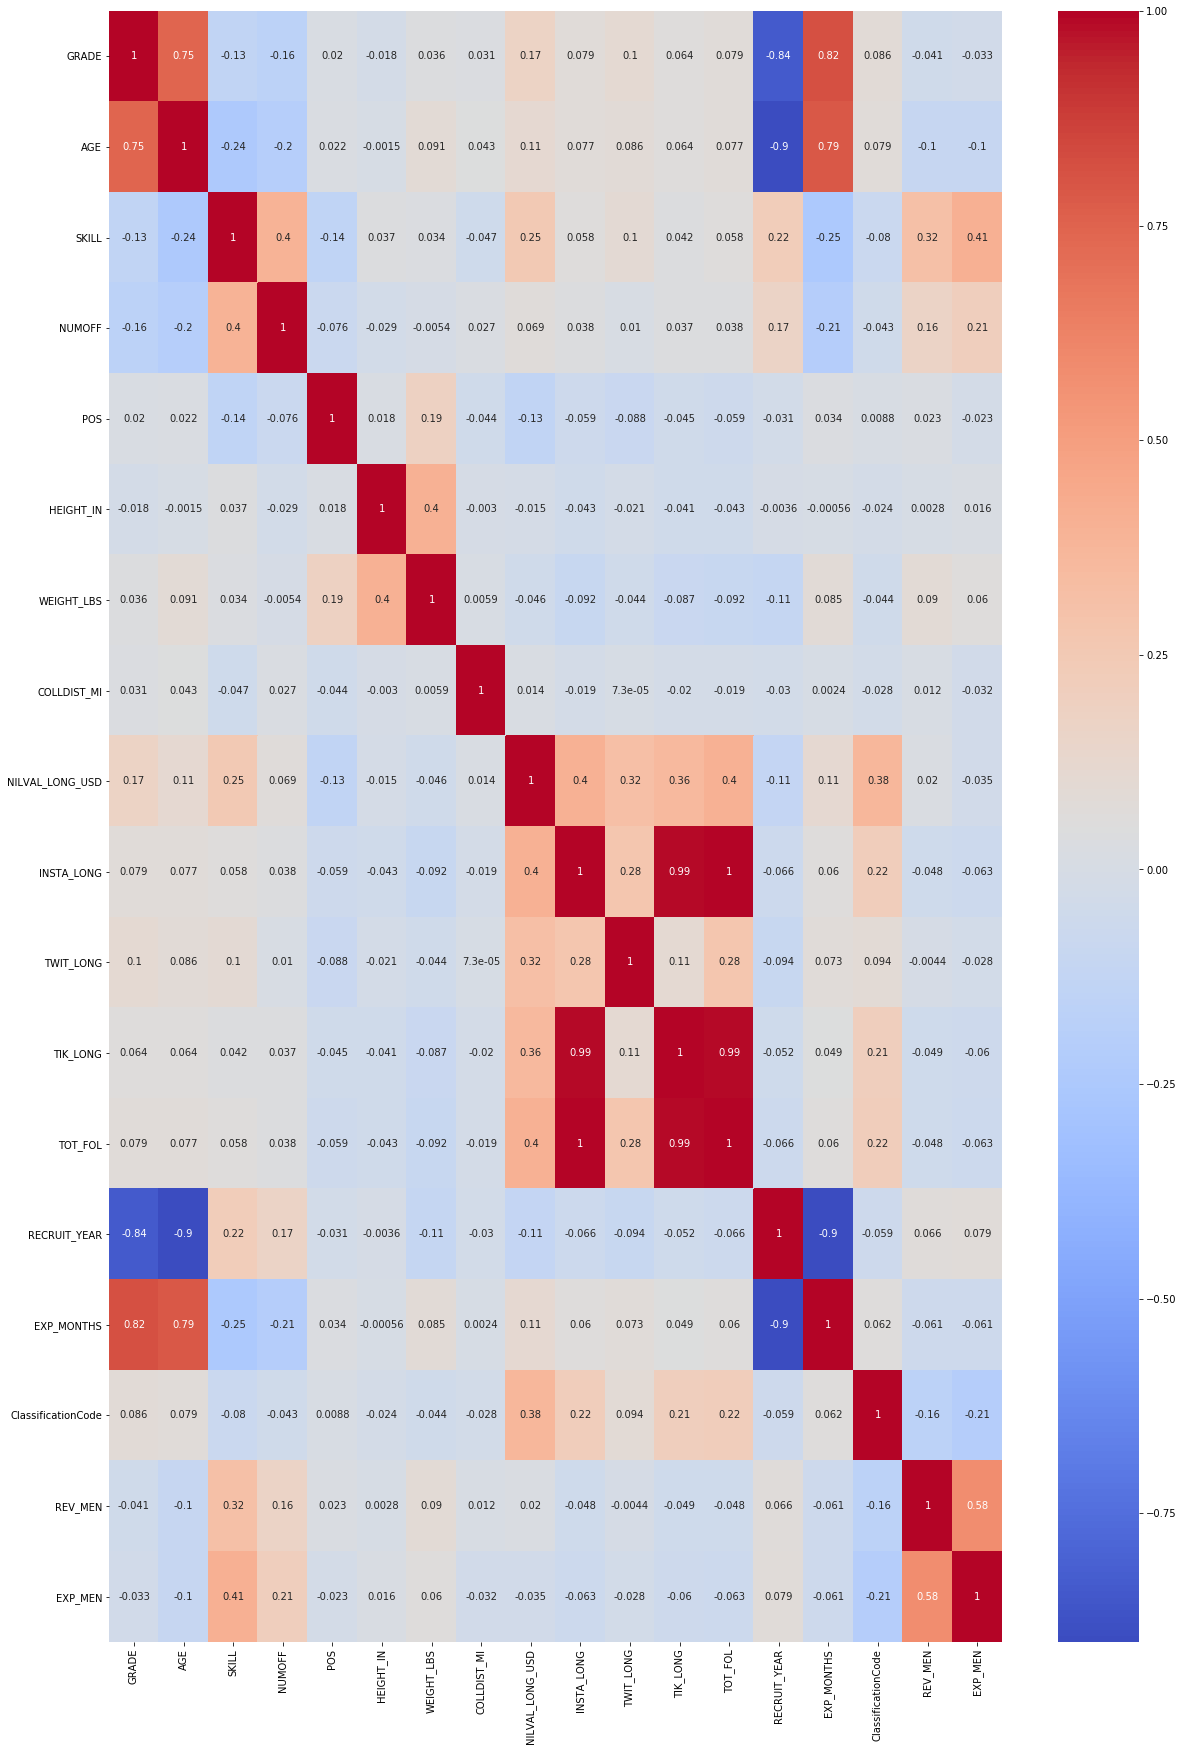

In [34]:
fig, ax = plt.subplots(figsize=(20,30))   
sns.heatmap(df_fb_select.corr(), annot=True,cmap ='coolwarm' )

In [35]:
#train-validation-test split
X_train, y_train, X_valid, y_valid, X_test, y_test = custom_train_test_split(df=df_fb_select)

# #check split
print (X_train.shape,y_train.shape )
print (X_valid.shape, y_valid.shape)
print (X_test.shape, y_test.shape)

# Create an instance of the LinearRegression model
model2 = LinearRegression()

# Train the model on the training set
model2.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model2.predict(X_valid)

# Make predictions on the validation set
y_test_pred = model2.predict(X_test)

#calculate and print test metrics on model using selected features
regression_results("Validation Select Features", y_valid, y_val_pred)

#calculate and print test metrics on model using selected features
regression_results("Testing Select Features", y_test, y_test_pred)



(883, 18) (883,)
(190, 18) (190,)
(190, 18) (190,)
Validation Select Features explained_variance:  0.2884
Validation Select Features r2:  0.277
Validation Select Features MAE:  109548.2593
Validation Select Features MSE:  127627658242.5276
Validation Select Features RMSE:  357250.134
Testing Select Features explained_variance:  0.2277
Testing Select Features r2:  0.2192
Testing Select Features MAE:  66682.4383
Testing Select Features MSE:  13115926293.6014
Testing Select Features RMSE:  114524.7846


In [62]:

 
# Get the coefficients (weights) of the features
coefficients = model2.coef_

# Calculate the feature importance by taking the absolute values of the coefficients
feature_importance2 = abs(coefficients)

 # Associate each feature importance value with the corresponding feature name
feature_names = list(X_train.columns)  
feature_importance_dict = dict(zip(feature_names, feature_importance2))

# Sort the feature importance values 
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)


# Print the feature importance
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")


ClassificationCode: 112721.1069634907
SKILL_CAT: 49587.99117289522
SKILL: 29506.617981910746
GRADE: 15543.641080244914
RECRUIT_YEAR: 11115.082645817261
AGE: 5648.593002103065
POS: 4303.134580726891
EXP_MONTHS: 1287.013593081477
NUMOFF: 783.5459003865345
HEIGHT_IN: 710.6678312077523
WEIGHT_LBS: 50.538777535479596
COLLDIST_MI: 8.301293529233206
TWIT_LONG: 1.7797921193565647
TIK_LONG: 1.0075714748395084
INSTA_LONG: 0.77223342177841
TOT_FOL: 0.7722331641503933
EXP_MEN: 0.002077172721522774
REV_MEN: 0.0006342098117939703


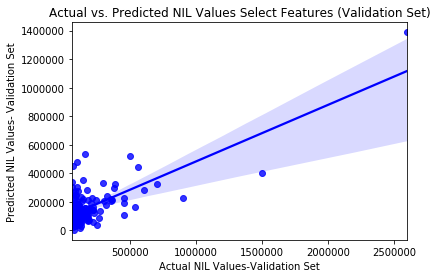

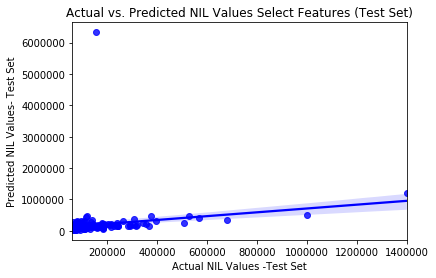

In [63]:
# Visualize the results (scatter plot of actual vs. predicted values for the validation set)

sns.regplot(x=y_valid, y=y_val_pred,color = 'blue')
plt.xlabel("Actual NIL Values-Validation Set")
plt.ylabel("Predicted NIL Values- Validation Set")
plt.title("Actual vs. Predicted NIL Values Select Features (Validation Set)")
plt.show()

# Visualize the results (scatter plot of actual vs. predicted values for the test set)

sns.regplot(x=y_test, y=y_test_pred,color = 'blue')
plt.xlabel("Actual NIL Values -Test Set")
plt.ylabel("Predicted NIL Values- Test Set")
plt.title("Actual vs. Predicted NIL Values Select Features (Test Set)")
plt.show()

**Getting similar metrics/ weak performance with this feature selection**
Is feature scaling an issue?

**Applying Standardization (Z-Score Scaling)** Sclaes features to have a mean of 0 and a standard deviation of 1. Recommended when data doesn't have a known bounded range.

In [64]:
#train-validation-test split
X_train, y_train, X_valid, y_valid, X_test, y_test = custom_train_test_split(df=df_fb_select)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on your training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_valid_scaled = scaler.transform(X_valid)  # For validation data
X_test_scaled = scaler.transform(X_test)    # For test data

# Create an instance of the LinearRegression model
model3 = LinearRegression()

# Train the model on the scaled training data
model3.fit(X_train_scaled, y_train)


# Make predictions on the scaled validation data with Standardization
y_valid_pred = model3.predict(X_valid_scaled)

# Make predictions on the scaled  test data
y_test_pred = model3.predict(X_test_scaled)

#calculate and print test metrics on model using selected features with Standardization
regression_results("Validation_Standardization", y_valid, y_valid_pred)

#calculate and print test metrics on model using selected features with Standardization
regression_results("Validation", y_test, y_test_pred)

Validation_Standardization explained_variance:  0.3089
Validation_Standardization r2:  0.2976
Validation_Standardization MAE:  108905.3976
Validation_Standardization MSE:  123982474750.5167
Validation_Standardization RMSE:  352111.4522
Validation explained_variance:  0.2248
Validation r2:  0.2162
Validation MAE:  66462.1524
Validation MSE:  13165167775.69
Validation RMSE:  114739.565


**Min_Max Scaler** Scales features to a specific range, typically between 0 and 1. Recommended when known that data has a bounded range and  maintaining the interpretability of features in the original scale is desired.

In [43]:

#train-validation-test split
X_train, y_train, X_valid, y_valid, X_test, y_test = custom_train_test_split(df=df_fb_select)

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on your training data and transform the data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Create an instance of the LinearRegression model
model4 = LinearRegression()

# Train the model on the scaled training data
model4.fit(X_train_scaled, y_train)
# Make predictions on the scaled MinMax validation data
y_valid_pred = model4.predict(X_valid_scaled)

# Make predictions on the scaled MinMax  test data
y_test_pred = model4.predict(X_test_scaled)

#calculate and print test metrics on model using selected features with MinMax scaling
regression_results("Validation_MinMax", y_valid, y_valid_pred)

#calculate and print test metrics on model using selected features with MinMax scaling
regression_results("Testing_MinMax", y_test, y_test_pred)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Go Back and look if outliers are an issue**

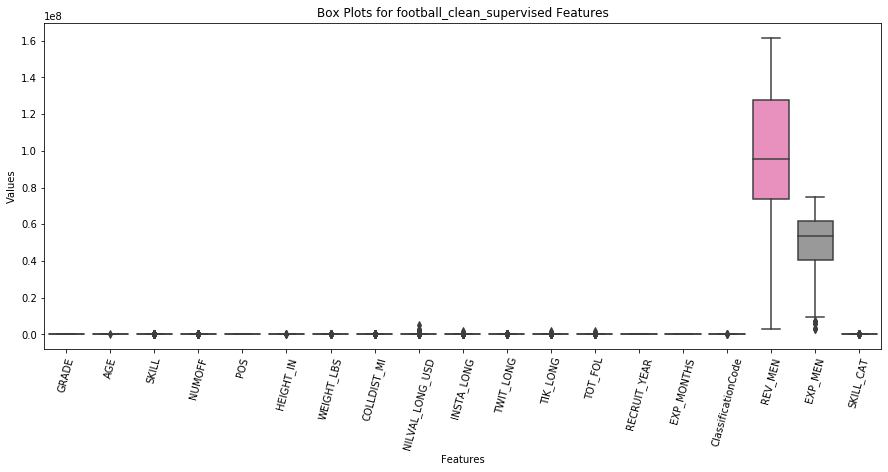

In [46]:
# df_fb_select.hist(grid = False, color = 'cadetblue', figsize=(30, 40))


plt.figure(figsize=(15, 6))
sns.boxplot(data=df_fb_select, orient='vertical', palette='Set1')
plt.title('Box Plots for football_clean_supervised Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=75)  
plt.show()

In [47]:

def remove_outliers (df, features_to_remove_outliers, record_removed_indices):
    """ Remove outliers from a DataFrame for specified features.Parameters:
    - df: The input DataFrame.
    - features_to_remove_outliers: List of feature names for which outliers should be removed.
    - record_removed_indices: List to record indices of removed outliers.

    Returns:
    - df_cleaned: DataFrame with outliers removed.   """

    df_cleaned = df.copy()  # Create a copy to keep the original data intact
    for feature_name in features_to_remove_outliers:
        Q1 = df_cleaned[feature_name].quantile(0.25)
        Q3 = df_cleaned[feature_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify the indices of outliers for the current feature
        outlier_indices = df_cleaned[(df_cleaned[feature_name] < lower_bound) | (df_cleaned[feature_name] > upper_bound)].index

        # Record the indices of removed outliers
        record_removed_indices.extend(outlier_indices)

        # Remove outliers for the current feature
        df_cleaned = df_cleaned.drop(outlier_indices)
        return df_cleaned




In [48]:

# Empty list to store indices of removed outliers
removed_outlier_indices = []

# List of features for to check and remove outliers- Not using NILVal since it is the target
features_to_remove_outliers = [ 'EXP_MEN']

# Apply the remove_outliers function to the DataFrame
df_fb_sel_cln = remove_outliers(df_fb_select, features_to_remove_outliers, removed_outlier_indices)

In [65]:
# len(removed_outlier_indices)
# len(df_fb_sel_cln)

**Linear Regression - Using Select Features, outlier removal**

In [66]:
#train-validation-test split on df with outliers removed (Exp Men feature)
X_train, y_train, X_valid, y_valid, X_test, y_test = custom_train_test_split(df=df_fb_sel_cln)


# Create an instance of the LinearRegression model
model6 = LinearRegression()

# Train the model on the scaled training data
model6.fit(X_train, y_train)

#Make predictions on the validation data select features/outlier removed
y_valid_pred = model6.predict(X_valid)

# Make predictions on the test data select features/outlier removed
y_test_pred = model6.predict(X_test)

#calculate and print test metrics on model using selected features
regression_results("Validation_Select_Outlier", y_valid, y_valid_pred)

#calculate and print test metrics on model using selected features
regression_results("Testing_Select_Outlier", y_test, y_test_pred)


Validation_Select_Outlier explained_variance:  0.5005
Validation_Select_Outlier r2:  0.4975
Validation_Select_Outlier MAE:  85778.3715
Validation_Select_Outlier MSE:  27940526771.4377
Validation_Select_Outlier RMSE:  167154.2006
Testing_Select_Outlier explained_variance:  -8.8045
Testing_Select_Outlier r2:  -8.8944
Testing_Select_Outlier MAE:  95082.2455
Testing_Select_Outlier MSE:  211093338297.7017
Testing_Select_Outlier RMSE:  459448.9507


Validation r2 increases. What is going on with Testing r2????

**Linear Regression- Using Select Features, Standardization, outlier removal** 

In [ ]:
#train-validation-test split on df with outliers removed (Exp Men feature)
X_train, y_train, X_valid, y_valid, X_test, y_test = custom_train_test_split(df=df_fb_sel_cln)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on your training data and transform the data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Create an instance of the LinearRegression model
model8 = LinearRegression()

# Train the model on the scaled training data
model8.fit(X_train_scaled, y_train)

# Make predictions on the scaled validation data
y_valid_pred = model8.predict(X_valid_scaled)

# Make predictions on the scaled  test data
y_test_pred = model8.predict(X_test_scaled)


#calculate and print test metrics on model using selected features
regression_results("Validation_MinMax", y_valid, y_valid_pred)

#calculate and print test metrics on model using selected features
regression_results("Testing_MinMax", y_test, y_test_pred)


**Linear Regression - Using Select Features, MinMax, outlier removal**

In [67]:
#train-validation-test split on df with outliers removed (Exp Men feature)
X_train, y_train, X_valid, y_valid, X_test, y_test = custom_train_test_split(df=df_fb_sel_cln)

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on your training data and transform the data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Create an instance of the LinearRegression model
model5 = LinearRegression()

# Train the model on the scaled training data
model5.fit(X_train_scaled, y_train)

# Make predictions on the scaled validation data
y_valid_pred = model5.predict(X_valid_scaled)

# Make predictions on the scaled  test data
y_test_pred = model5.predict(X_test_scaled)

#calculate and print test metrics on model using selected features
regression_results("Validation_MinMax", y_valid, y_valid_pred)

#calculate and print test metrics on model using selected features
regression_results("Testing_MinMax", y_test, y_test_pred)

Validation_MinMax explained_variance:  0.5005
Validation_MinMax r2:  0.4975
Validation_MinMax MAE:  85778.3715
Validation_MinMax MSE:  27940526772.0659
Validation_MinMax RMSE:  167154.2006
Testing_MinMax explained_variance:  -8.8045
Testing_MinMax r2:  -8.8944
Testing_MinMax MAE:  95082.2455
Testing_MinMax MSE:  211093338259.2898
Testing_MinMax RMSE:  459448.9507


# Lasso Regression- Select Features only

Lasso is sensitve to feature scaling. 

In [ ]:
from sklearn.linear_model import Lasso

In [68]:
# #train-validation-test split on df_fb_select first
X_train, y_train, X_valid, y_valid, X_test, y_test = custom_train_test_split(df=df_fb_select)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid= scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

#Create Lasso model
lasso = Lasso(alpha = 1,max_iter= 10000,random_state = 42)
lasso.fit(X_train,y_train)

pred_train_lasso= lasso.predict(X_train)
rmse_train = round(np.sqrt(mean_squared_error(y_train,pred_train_lasso)),2)
r2_train  = round(r2_score(y_train, pred_train_lasso),2)

pred_valid_lasso= lasso.predict(X_valid)
rmse_valid = round(np.sqrt(mean_squared_error(y_valid,pred_valid_lasso)),2)
r2_valid = round((r2_score(y_train, pred_train_lasso)),2)

pred_test_lasso= lasso.predict(X_test)
rmse_test= round( np.sqrt(mean_squared_error(y_test,pred_test_lasso)),2)
r2_test =round( (r2_score(y_test, pred_test_lasso)),2)




print("The RMSE train score for ls model is {}".format(rmse_train))
print("The R2 train score for ls model is {}".format(r2_train))
print("The RMSE validation score for ls model is {}".format(rmse_valid))
print("The R2 validation score for ls model is {}".format(r2_valid))
print("The RMSE test score for ls model is {}".format(rmse_test))
print("The R2 test score for ls model is {}".format(r2_test))

The RMSE train score for ls model is 164796.74
The R2 train score for ls model is 0.29
The RMSE validation score for ls model is 348635.87
The R2 validation score for ls model is 0.29
The RMSE test score for ls model is 126464.92
The R2 test score for ls model is 0.05


**ElasticNet**

In [119]:
#Elastic Net
# #train-validation-test split on df_fb_select first
X_train, y_train, X_valid, y_valid, X_test, y_test = custom_train_test_split(df=df_fb_select)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid= scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)


model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
pred_valid_enet= model_enet.predict(X_valid)
pred_test_enet= model_enet.predict(X_test)


print("The training MSE for ENET is {0:10.2f}".format(round(np.sqrt(mean_squared_error(y_train,pred_train_enet)),2)))
r2score= r2_score(y_train, pred_train_enet)
print("The training R2 for ENET is {0:10.2f}".format((r2score)))


print("The validation MSE for ENET is {0:10.2f}".format(np.sqrt(mean_squared_error(y_valid,pred_valid_enet))))
r2score= r2_score(y_valid, pred_valid_enet)
print("The training R2 for ENET is {0:10.2f}".format((r2score)))

pred_test_enet= model_enet.predict(X_test)
print("The test MSE for ENET is {0:10.2f}".format(round(np.sqrt(mean_squared_error(y_test,pred_test_enet)),2)))
print("The test R2 for ENET is {0:10.2f}".format(r2_score(y_test, pred_test_enet)))


The training MSE for ENET is  164804.44
The training R2 for ENET is       0.29
The validation MSE for ENET is  347275.93
The training R2 for ENET is       0.32
The test MSE for ENET is  126273.66
The test R2 for ENET is       0.05


c:\Users\kakib\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11301784478992.486, tolerance: 3384600344.9603624
  positive)


**Even Less Features**

In [121]:
''' Trying less features than above due to preivous weak models above '''



columns = ['GRADE','SKILL',   'NILVAL_LONG_USD',
       'INSTA_LONG', 'TWIT_LONG', 'TIK_LONG', 'TOT_FOL', 
       'EXP_MONTHS',   'ClassificationCode' ]


df_fb_select2 = df_fb_select.loc[:, columns].copy()

In [122]:
df_fb_select2.columns

Index(['GRADE', 'SKILL', 'NILVAL_LONG_USD', 'INSTA_LONG', 'TWIT_LONG',
       'TIK_LONG', 'TOT_FOL', 'EXP_MONTHS', 'ClassificationCode'],
      dtype='object')

In [123]:
#Linear Regression Model
#train-validation-test split
X_train, y_train, X_valid, y_valid, X_test, y_test = custom_train_test_split(df=df_fb_select2)

# #check split
print (X_train.shape,y_train.shape )
print (X_valid.shape, y_valid.shape)
print (X_test.shape, y_test.shape)

# Create an instance of the LinearRegression model
model9 = LinearRegression()

# Train the model on the training set
model9.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model9.predict(X_valid)

# Make predictions on the validation set
y_test_pred = model9.predict(X_test)

#calculate and print test metrics on model using selected features
regression_results("Validation Select Features", y_valid, y_val_pred)

#calculate and print test metrics on model using selected features
regression_results("Testing Select Features", y_test, y_test_pred)



(883, 9) (883,)
(190, 9) (190,)
(190, 9) (190,)
Validation Select Features explained_variance:  0.2878
Validation Select Features r2:  0.2771
Validation Select Features MAE:  104507.4394
Validation Select Features MSE:  127604420080.183
Validation Select Features RMSE:  357217.6089
Testing Select Features explained_variance:  0.199
Testing Select Features r2:  0.1946
Testing Select Features MAE:  66129.1827
Testing Select Features MSE:  13528479786.1105
Testing Select Features RMSE:  116311.9933


**PCA**

def dimReductionPrep(X_train):
    """
        :: Input(s) ::
            X_train - the training feature dataset
        :: Output(s) ::
            X_train_Reduced - the training feature dataset with only numeric columns included
        :: Explaination of Function ::
            Lots of unsupervised functions require that data be mean centered and normalized. We cannot mean center and normalize non-numerica data so this function helps
            take the output from "traintestsplit" and reduce the columns down to only those with numeric features
    """

    cols2Keep = ['AGE', 'SKILL', 'NUMOFF', 'POS', 'HEIGHT_IN',
                 'WEIGHT_LBS', 'COLLDIST_MI', 'TOT_FOL', 'EXP_MONTHS',
                 'ClassificationCode', 'REV_MEN', 'EXP_MEN']
    
    X_train_Reduced = X_train[cols2Keep]

    return X_train_Reduced

In [ ]:
def custom_PCA_Scree(X_train_Reduced, threshold=0.8, RANDOM_STATE=0):
    """
        :: Input(s) ::
            X_train_Reduced - training data with only numeric columns (from dimReductionPrep)
            threshold - the amount of explained variance that the user would like to be captured by the minimum number of pricipal components (default is 0.8)
            RANDOM_STATE - Random State of the PCA process so that repeatability is ensured
        :: Output(s) ::
            None
        :: Explaination of Function ::
        This fucntion performs Principal Components Analysis (PCA)
        The goal here is two fold:
            1. Generate a Scree Plot that incorporates an explained varaince ratio
            2. Help the user determine the minumum number of components in order to consider utilizing PCA
    """

    # Normalize the data prior to performing PCA!
    # This is crucial as we do not want magnitude of a feature to play a role
    X_train_Norm = StandardScaler().fit_transform(X_train_Reduced)
    pca = PCA(random_state=RANDOM_STATE)
    X_pca = pca.fit_transform(X_train_Norm)

    # Since the n_comp is dynamic, we need a dynamic way to show the PC's
    PCs = []
    for i in range(len(X_train_Reduced.columns)):
        PCs.append('PC{}'.format(i+1))

    # Generate the Cumulative Sum of Explained Variance
    dfCumul = pd.DataFrame({'perc_explained_var_ratio': pca.explained_variance_ratio_,
                            'PC': PCs})
    dfCumul['cumulative_variance'] = dfCumul['perc_explained_var_ratio'].cumsum()
    n_components_thresh = np.argmax(dfCumul['cumulative_variance'] >= threshold) + 1

    # dfScree = pd.DataFrame({'explained_var': np.sqrt(pca.explained_variance_),
    #                         'PC': PCs})

    # Generate the Scree Plot
    plt.figure(figsize=(8,6))
    plt.plot(dfCumul['PC'],
             dfCumul['perc_explained_var_ratio'],
             color='b',
             marker='o',
             linestyle='--',
             label='Variance Explained by PC')
    plt.xlabel('Principal Component (PC)')
    plt.ylabel('Percentage of Explained Variance')
    plt.title('PCA Scree Plot')
    
    plt.plot(dfCumul['PC'],
             dfCumul['cumulative_variance'],
             color='k',
             label="Cumulative Variance Explained")
    
    plt.axvline(dfCumul['PC'][n_components_thresh - 1],
                color='red',
                label="{:.0f}% Threshold".format(threshold*100))
    
    plt.legend()
    plt.show()

    return None

KeyError: "['NILVAL_LONG_USD'] not found in axis"